# Music Classification

Our main goal is to be able to make accurate predictions on a song’s genre. To achieve this, we will explore ways on how neural network architectures and splitting the training and testing data among groups affect our results and see if there are any benefits to do so.

We will also use multiple models - CNN, RNN - to achieve the best accuracy. Our main end goal is to them let anyone play around with our model, input any song and predict its genre.

[genre] is an integer from 0 to 9, indicating the genres Pop, ... respectively.

## Table of content
1. Importing modules
2. Loading Dataset
3. Analyze Distributions
    * Genre Distribution
4. Split and Preprocess the data
5. Modelling and Training
    * CNN
    * RNN
5. Evaluating Models

## 1. Load modules

In [26]:
import json
import os
import math
import librosa
import pandas as pd
import numpy as np
import urllib.request
from PIL import Image
import IPython.display as ipd
from pytube import YouTube
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import pandas as pd
from sklearn.model_selection import train_test_split

# To ensure reproducible results
RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)
tf.random.set_seed(0)

## 2. Load dataset

In [2]:
DATASET_PATH = "data/genres"
JSON_PATH = "data.json"
NUM_SEGMENTS = 10
HOP_LENGTH=512
SAMPLE_RATE = 22050  # music processing
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
GENRE_CATEGORIES = []

In [3]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """
    # check is data.json exists
#     if (os.path.exists(json_path)):
#         print(json_path, "already exists. Loading data stopped.")
#         return
    
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            GENRE_CATEGORIES.append(semantic_label)
#             data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i - 1)
                        print("{}, segment:{}".format(file_path, d + 1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [4]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: pop
data/genres/pop/pop.00027.wav, segment:1
data/genres/pop/pop.00027.wav, segment:2
data/genres/pop/pop.00027.wav, segment:3
data/genres/pop/pop.00027.wav, segment:4
data/genres/pop/pop.00027.wav, segment:5
data/genres/pop/pop.00027.wav, segment:6
data/genres/pop/pop.00027.wav, segment:7
data/genres/pop/pop.00027.wav, segment:8
data/genres/pop/pop.00027.wav, segment:9
data/genres/pop/pop.00027.wav, segment:10
data/genres/pop/pop.00033.wav, segment:1
data/genres/pop/pop.00033.wav, segment:2
data/genres/pop/pop.00033.wav, segment:3
data/genres/pop/pop.00033.wav, segment:4
data/genres/pop/pop.00033.wav, segment:5
data/genres/pop/pop.00033.wav, segment:6
data/genres/pop/pop.00033.wav, segment:7
data/genres/pop/pop.00033.wav, segment:8
data/genres/pop/pop.00033.wav, segment:9
data/genres/pop/pop.00033.wav, segment:10
data/genres/pop/pop.00032.wav, segment:1
data/genres/pop/pop.00032.wav, segment:2
data/genres/pop/pop.00032.wav, segment:3
data/genres/pop/pop.00032.wav, segment

data/genres/pop/pop.00044.wav, segment:9
data/genres/pop/pop.00044.wav, segment:10
data/genres/pop/pop.00050.wav, segment:1
data/genres/pop/pop.00050.wav, segment:2
data/genres/pop/pop.00050.wav, segment:3
data/genres/pop/pop.00050.wav, segment:4
data/genres/pop/pop.00050.wav, segment:5
data/genres/pop/pop.00050.wav, segment:6
data/genres/pop/pop.00050.wav, segment:7
data/genres/pop/pop.00050.wav, segment:8
data/genres/pop/pop.00050.wav, segment:9
data/genres/pop/pop.00050.wav, segment:10
data/genres/pop/pop.00078.wav, segment:1
data/genres/pop/pop.00078.wav, segment:2
data/genres/pop/pop.00078.wav, segment:3
data/genres/pop/pop.00078.wav, segment:4
data/genres/pop/pop.00078.wav, segment:5
data/genres/pop/pop.00078.wav, segment:6
data/genres/pop/pop.00078.wav, segment:7
data/genres/pop/pop.00078.wav, segment:8
data/genres/pop/pop.00078.wav, segment:9
data/genres/pop/pop.00078.wav, segment:10
data/genres/pop/pop.00087.wav, segment:1
data/genres/pop/pop.00087.wav, segment:2
data/genres/p

data/genres/pop/pop.00043.wav, segment:1
data/genres/pop/pop.00043.wav, segment:2
data/genres/pop/pop.00043.wav, segment:3
data/genres/pop/pop.00043.wav, segment:4
data/genres/pop/pop.00043.wav, segment:5
data/genres/pop/pop.00043.wav, segment:6
data/genres/pop/pop.00043.wav, segment:7
data/genres/pop/pop.00043.wav, segment:8
data/genres/pop/pop.00043.wav, segment:9
data/genres/pop/pop.00043.wav, segment:10
data/genres/pop/pop.00057.wav, segment:1
data/genres/pop/pop.00057.wav, segment:2
data/genres/pop/pop.00057.wav, segment:3
data/genres/pop/pop.00057.wav, segment:4
data/genres/pop/pop.00057.wav, segment:5
data/genres/pop/pop.00057.wav, segment:6
data/genres/pop/pop.00057.wav, segment:7
data/genres/pop/pop.00057.wav, segment:8
data/genres/pop/pop.00057.wav, segment:9
data/genres/pop/pop.00057.wav, segment:10
data/genres/pop/pop.00069.wav, segment:1
data/genres/pop/pop.00069.wav, segment:2
data/genres/pop/pop.00069.wav, segment:3
data/genres/pop/pop.00069.wav, segment:4
data/genres/po

data/genres/pop/pop.00099.wav, segment:2
data/genres/pop/pop.00099.wav, segment:3
data/genres/pop/pop.00099.wav, segment:4
data/genres/pop/pop.00099.wav, segment:5
data/genres/pop/pop.00099.wav, segment:6
data/genres/pop/pop.00099.wav, segment:7
data/genres/pop/pop.00099.wav, segment:8
data/genres/pop/pop.00099.wav, segment:9
data/genres/pop/pop.00099.wav, segment:10
data/genres/pop/pop.00098.wav, segment:1
data/genres/pop/pop.00098.wav, segment:2
data/genres/pop/pop.00098.wav, segment:3
data/genres/pop/pop.00098.wav, segment:4
data/genres/pop/pop.00098.wav, segment:5
data/genres/pop/pop.00098.wav, segment:6
data/genres/pop/pop.00098.wav, segment:7
data/genres/pop/pop.00098.wav, segment:8
data/genres/pop/pop.00098.wav, segment:9
data/genres/pop/pop.00098.wav, segment:10
data/genres/pop/pop.00067.wav, segment:1
data/genres/pop/pop.00067.wav, segment:2
data/genres/pop/pop.00067.wav, segment:3
data/genres/pop/pop.00067.wav, segment:4
data/genres/pop/pop.00067.wav, segment:5
data/genres/po

data/genres/pop/pop.00038.wav, segment:10
data/genres/pop/pop.00004.wav, segment:1
data/genres/pop/pop.00004.wav, segment:2
data/genres/pop/pop.00004.wav, segment:3
data/genres/pop/pop.00004.wav, segment:4
data/genres/pop/pop.00004.wav, segment:5
data/genres/pop/pop.00004.wav, segment:6
data/genres/pop/pop.00004.wav, segment:7
data/genres/pop/pop.00004.wav, segment:8
data/genres/pop/pop.00004.wav, segment:9
data/genres/pop/pop.00004.wav, segment:10
data/genres/pop/pop.00010.wav, segment:1
data/genres/pop/pop.00010.wav, segment:2
data/genres/pop/pop.00010.wav, segment:3
data/genres/pop/pop.00010.wav, segment:4
data/genres/pop/pop.00010.wav, segment:5
data/genres/pop/pop.00010.wav, segment:6
data/genres/pop/pop.00010.wav, segment:7
data/genres/pop/pop.00010.wav, segment:8
data/genres/pop/pop.00010.wav, segment:9
data/genres/pop/pop.00010.wav, segment:10
data/genres/pop/pop.00028.wav, segment:1
data/genres/pop/pop.00028.wav, segment:2
data/genres/pop/pop.00028.wav, segment:3
data/genres/p

data/genres/metal/metal.00034.wav, segment:3
data/genres/metal/metal.00034.wav, segment:4
data/genres/metal/metal.00034.wav, segment:5
data/genres/metal/metal.00034.wav, segment:6
data/genres/metal/metal.00034.wav, segment:7
data/genres/metal/metal.00034.wav, segment:8
data/genres/metal/metal.00034.wav, segment:9
data/genres/metal/metal.00034.wav, segment:10
data/genres/metal/metal.00008.wav, segment:1
data/genres/metal/metal.00008.wav, segment:2
data/genres/metal/metal.00008.wav, segment:3
data/genres/metal/metal.00008.wav, segment:4
data/genres/metal/metal.00008.wav, segment:5
data/genres/metal/metal.00008.wav, segment:6
data/genres/metal/metal.00008.wav, segment:7
data/genres/metal/metal.00008.wav, segment:8
data/genres/metal/metal.00008.wav, segment:9
data/genres/metal/metal.00008.wav, segment:10
data/genres/metal/metal.00030.wav, segment:1
data/genres/metal/metal.00030.wav, segment:2
data/genres/metal/metal.00030.wav, segment:3
data/genres/metal/metal.00030.wav, segment:4
data/gen

data/genres/metal/metal.00083.wav, segment:2
data/genres/metal/metal.00083.wav, segment:3
data/genres/metal/metal.00083.wav, segment:4
data/genres/metal/metal.00083.wav, segment:5
data/genres/metal/metal.00083.wav, segment:6
data/genres/metal/metal.00083.wav, segment:7
data/genres/metal/metal.00083.wav, segment:8
data/genres/metal/metal.00083.wav, segment:9
data/genres/metal/metal.00083.wav, segment:10
data/genres/metal/metal.00095.wav, segment:1
data/genres/metal/metal.00095.wav, segment:2
data/genres/metal/metal.00095.wav, segment:3
data/genres/metal/metal.00095.wav, segment:4
data/genres/metal/metal.00095.wav, segment:5
data/genres/metal/metal.00095.wav, segment:6
data/genres/metal/metal.00095.wav, segment:7
data/genres/metal/metal.00095.wav, segment:8
data/genres/metal/metal.00095.wav, segment:9
data/genres/metal/metal.00095.wav, segment:10
data/genres/metal/metal.00081.wav, segment:1
data/genres/metal/metal.00081.wav, segment:2
data/genres/metal/metal.00081.wav, segment:3
data/gen

data/genres/metal/metal.00078.wav, segment:1
data/genres/metal/metal.00078.wav, segment:2
data/genres/metal/metal.00078.wav, segment:3
data/genres/metal/metal.00078.wav, segment:4
data/genres/metal/metal.00078.wav, segment:5
data/genres/metal/metal.00078.wav, segment:6
data/genres/metal/metal.00078.wav, segment:7
data/genres/metal/metal.00078.wav, segment:8
data/genres/metal/metal.00078.wav, segment:9
data/genres/metal/metal.00078.wav, segment:10
data/genres/metal/metal.00079.wav, segment:1
data/genres/metal/metal.00079.wav, segment:2
data/genres/metal/metal.00079.wav, segment:3
data/genres/metal/metal.00079.wav, segment:4
data/genres/metal/metal.00079.wav, segment:5
data/genres/metal/metal.00079.wav, segment:6
data/genres/metal/metal.00079.wav, segment:7
data/genres/metal/metal.00079.wav, segment:8
data/genres/metal/metal.00079.wav, segment:9
data/genres/metal/metal.00079.wav, segment:10
data/genres/metal/metal.00051.wav, segment:1
data/genres/metal/metal.00051.wav, segment:2
data/gen

data/genres/metal/metal.00067.wav, segment:2
data/genres/metal/metal.00067.wav, segment:3
data/genres/metal/metal.00067.wav, segment:4
data/genres/metal/metal.00067.wav, segment:5
data/genres/metal/metal.00067.wav, segment:6
data/genres/metal/metal.00067.wav, segment:7
data/genres/metal/metal.00067.wav, segment:8
data/genres/metal/metal.00067.wav, segment:9
data/genres/metal/metal.00067.wav, segment:10
data/genres/metal/metal.00073.wav, segment:1
data/genres/metal/metal.00073.wav, segment:2
data/genres/metal/metal.00073.wav, segment:3
data/genres/metal/metal.00073.wav, segment:4
data/genres/metal/metal.00073.wav, segment:5
data/genres/metal/metal.00073.wav, segment:6
data/genres/metal/metal.00073.wav, segment:7
data/genres/metal/metal.00073.wav, segment:8
data/genres/metal/metal.00073.wav, segment:9
data/genres/metal/metal.00073.wav, segment:10
data/genres/metal/metal.00098.wav, segment:1
data/genres/metal/metal.00098.wav, segment:2
data/genres/metal/metal.00098.wav, segment:3
data/gen

data/genres/metal/metal.00011.wav, segment:1
data/genres/metal/metal.00011.wav, segment:2
data/genres/metal/metal.00011.wav, segment:3
data/genres/metal/metal.00011.wav, segment:4
data/genres/metal/metal.00011.wav, segment:5
data/genres/metal/metal.00011.wav, segment:6
data/genres/metal/metal.00011.wav, segment:7
data/genres/metal/metal.00011.wav, segment:8
data/genres/metal/metal.00011.wav, segment:9
data/genres/metal/metal.00011.wav, segment:10
data/genres/metal/metal.00005.wav, segment:1
data/genres/metal/metal.00005.wav, segment:2
data/genres/metal/metal.00005.wav, segment:3
data/genres/metal/metal.00005.wav, segment:4
data/genres/metal/metal.00005.wav, segment:5
data/genres/metal/metal.00005.wav, segment:6
data/genres/metal/metal.00005.wav, segment:7
data/genres/metal/metal.00005.wav, segment:8
data/genres/metal/metal.00005.wav, segment:9
data/genres/metal/metal.00005.wav, segment:10
data/genres/metal/metal.00039.wav, segment:1
data/genres/metal/metal.00039.wav, segment:2
data/gen

data/genres/disco/disco.00086.wav, segment:10
data/genres/disco/disco.00092.wav, segment:1
data/genres/disco/disco.00092.wav, segment:2
data/genres/disco/disco.00092.wav, segment:3
data/genres/disco/disco.00092.wav, segment:4
data/genres/disco/disco.00092.wav, segment:5
data/genres/disco/disco.00092.wav, segment:6
data/genres/disco/disco.00092.wav, segment:7
data/genres/disco/disco.00092.wav, segment:8
data/genres/disco/disco.00092.wav, segment:9
data/genres/disco/disco.00092.wav, segment:10
data/genres/disco/disco.00093.wav, segment:1
data/genres/disco/disco.00093.wav, segment:2
data/genres/disco/disco.00093.wav, segment:3
data/genres/disco/disco.00093.wav, segment:4
data/genres/disco/disco.00093.wav, segment:5
data/genres/disco/disco.00093.wav, segment:6
data/genres/disco/disco.00093.wav, segment:7
data/genres/disco/disco.00093.wav, segment:8
data/genres/disco/disco.00093.wav, segment:9
data/genres/disco/disco.00093.wav, segment:10
data/genres/disco/disco.00087.wav, segment:1
data/ge

data/genres/disco/disco.00095.wav, segment:9
data/genres/disco/disco.00095.wav, segment:10
data/genres/disco/disco.00042.wav, segment:1
data/genres/disco/disco.00042.wav, segment:2
data/genres/disco/disco.00042.wav, segment:3
data/genres/disco/disco.00042.wav, segment:4
data/genres/disco/disco.00042.wav, segment:5
data/genres/disco/disco.00042.wav, segment:6
data/genres/disco/disco.00042.wav, segment:7
data/genres/disco/disco.00042.wav, segment:8
data/genres/disco/disco.00042.wav, segment:9
data/genres/disco/disco.00042.wav, segment:10
data/genres/disco/disco.00056.wav, segment:1
data/genres/disco/disco.00056.wav, segment:2
data/genres/disco/disco.00056.wav, segment:3
data/genres/disco/disco.00056.wav, segment:4
data/genres/disco/disco.00056.wav, segment:5
data/genres/disco/disco.00056.wav, segment:6
data/genres/disco/disco.00056.wav, segment:7
data/genres/disco/disco.00056.wav, segment:8
data/genres/disco/disco.00056.wav, segment:9
data/genres/disco/disco.00056.wav, segment:10
data/ge

data/genres/disco/disco.00009.wav, segment:2
data/genres/disco/disco.00009.wav, segment:3
data/genres/disco/disco.00009.wav, segment:4
data/genres/disco/disco.00009.wav, segment:5
data/genres/disco/disco.00009.wav, segment:6
data/genres/disco/disco.00009.wav, segment:7
data/genres/disco/disco.00009.wav, segment:8
data/genres/disco/disco.00009.wav, segment:9
data/genres/disco/disco.00009.wav, segment:10
data/genres/disco/disco.00010.wav, segment:1
data/genres/disco/disco.00010.wav, segment:2
data/genres/disco/disco.00010.wav, segment:3
data/genres/disco/disco.00010.wav, segment:4
data/genres/disco/disco.00010.wav, segment:5
data/genres/disco/disco.00010.wav, segment:6
data/genres/disco/disco.00010.wav, segment:7
data/genres/disco/disco.00010.wav, segment:8
data/genres/disco/disco.00010.wav, segment:9
data/genres/disco/disco.00010.wav, segment:10
data/genres/disco/disco.00004.wav, segment:1
data/genres/disco/disco.00004.wav, segment:2
data/genres/disco/disco.00004.wav, segment:3
data/gen

data/genres/disco/disco.00073.wav, segment:1
data/genres/disco/disco.00073.wav, segment:2
data/genres/disco/disco.00073.wav, segment:3
data/genres/disco/disco.00073.wav, segment:4
data/genres/disco/disco.00073.wav, segment:5
data/genres/disco/disco.00073.wav, segment:6
data/genres/disco/disco.00073.wav, segment:7
data/genres/disco/disco.00073.wav, segment:8
data/genres/disco/disco.00073.wav, segment:9
data/genres/disco/disco.00073.wav, segment:10
data/genres/disco/disco.00067.wav, segment:1
data/genres/disco/disco.00067.wav, segment:2
data/genres/disco/disco.00067.wav, segment:3
data/genres/disco/disco.00067.wav, segment:4
data/genres/disco/disco.00067.wav, segment:5
data/genres/disco/disco.00067.wav, segment:6
data/genres/disco/disco.00067.wav, segment:7
data/genres/disco/disco.00067.wav, segment:8
data/genres/disco/disco.00067.wav, segment:9
data/genres/disco/disco.00067.wav, segment:10
data/genres/disco/disco.00098.wav, segment:1
data/genres/disco/disco.00098.wav, segment:2
data/gen

data/genres/disco/disco.00089.wav, segment:5
data/genres/disco/disco.00089.wav, segment:6
data/genres/disco/disco.00089.wav, segment:7
data/genres/disco/disco.00089.wav, segment:8
data/genres/disco/disco.00089.wav, segment:9
data/genres/disco/disco.00089.wav, segment:10
data/genres/disco/disco.00088.wav, segment:1
data/genres/disco/disco.00088.wav, segment:2
data/genres/disco/disco.00088.wav, segment:3
data/genres/disco/disco.00088.wav, segment:4
data/genres/disco/disco.00088.wav, segment:5
data/genres/disco/disco.00088.wav, segment:6
data/genres/disco/disco.00088.wav, segment:7
data/genres/disco/disco.00088.wav, segment:8
data/genres/disco/disco.00088.wav, segment:9
data/genres/disco/disco.00088.wav, segment:10
data/genres/disco/disco.00063.wav, segment:1
data/genres/disco/disco.00063.wav, segment:2
data/genres/disco/disco.00063.wav, segment:3
data/genres/disco/disco.00063.wav, segment:4
data/genres/disco/disco.00063.wav, segment:5
data/genres/disco/disco.00063.wav, segment:6
data/gen

data/genres/blues/blues.00085.wav, segment:9
data/genres/blues/blues.00085.wav, segment:10
data/genres/blues/blues.00081.wav, segment:1
data/genres/blues/blues.00081.wav, segment:2
data/genres/blues/blues.00081.wav, segment:3
data/genres/blues/blues.00081.wav, segment:4
data/genres/blues/blues.00081.wav, segment:5
data/genres/blues/blues.00081.wav, segment:6
data/genres/blues/blues.00081.wav, segment:7
data/genres/blues/blues.00081.wav, segment:8
data/genres/blues/blues.00081.wav, segment:9
data/genres/blues/blues.00081.wav, segment:10
data/genres/blues/blues.00095.wav, segment:1
data/genres/blues/blues.00095.wav, segment:2
data/genres/blues/blues.00095.wav, segment:3
data/genres/blues/blues.00095.wav, segment:4
data/genres/blues/blues.00095.wav, segment:5
data/genres/blues/blues.00095.wav, segment:6
data/genres/blues/blues.00095.wav, segment:7
data/genres/blues/blues.00095.wav, segment:8
data/genres/blues/blues.00095.wav, segment:9
data/genres/blues/blues.00095.wav, segment:10
data/ge

data/genres/blues/blues.00024.wav, segment:1
data/genres/blues/blues.00024.wav, segment:2
data/genres/blues/blues.00024.wav, segment:3
data/genres/blues/blues.00024.wav, segment:4
data/genres/blues/blues.00024.wav, segment:5
data/genres/blues/blues.00024.wav, segment:6
data/genres/blues/blues.00024.wav, segment:7
data/genres/blues/blues.00024.wav, segment:8
data/genres/blues/blues.00024.wav, segment:9
data/genres/blues/blues.00024.wav, segment:10
data/genres/blues/blues.00030.wav, segment:1
data/genres/blues/blues.00030.wav, segment:2
data/genres/blues/blues.00030.wav, segment:3
data/genres/blues/blues.00030.wav, segment:4
data/genres/blues/blues.00030.wav, segment:5
data/genres/blues/blues.00030.wav, segment:6
data/genres/blues/blues.00030.wav, segment:7
data/genres/blues/blues.00030.wav, segment:8
data/genres/blues/blues.00030.wav, segment:9
data/genres/blues/blues.00030.wav, segment:10
data/genres/blues/blues.00018.wav, segment:1
data/genres/blues/blues.00018.wav, segment:2
data/gen

data/genres/blues/blues.00011.wav, segment:4
data/genres/blues/blues.00011.wav, segment:5
data/genres/blues/blues.00011.wav, segment:6
data/genres/blues/blues.00011.wav, segment:7
data/genres/blues/blues.00011.wav, segment:8
data/genres/blues/blues.00011.wav, segment:9
data/genres/blues/blues.00011.wav, segment:10
data/genres/blues/blues.00039.wav, segment:1
data/genres/blues/blues.00039.wav, segment:2
data/genres/blues/blues.00039.wav, segment:3
data/genres/blues/blues.00039.wav, segment:4
data/genres/blues/blues.00039.wav, segment:5
data/genres/blues/blues.00039.wav, segment:6
data/genres/blues/blues.00039.wav, segment:7
data/genres/blues/blues.00039.wav, segment:8
data/genres/blues/blues.00039.wav, segment:9
data/genres/blues/blues.00039.wav, segment:10
data/genres/blues/blues.00038.wav, segment:1
data/genres/blues/blues.00038.wav, segment:2
data/genres/blues/blues.00038.wav, segment:3
data/genres/blues/blues.00038.wav, segment:4
data/genres/blues/blues.00038.wav, segment:5
data/gen

data/genres/blues/blues.00099.wav, segment:10
data/genres/blues/blues.00066.wav, segment:1
data/genres/blues/blues.00066.wav, segment:2
data/genres/blues/blues.00066.wav, segment:3
data/genres/blues/blues.00066.wav, segment:4
data/genres/blues/blues.00066.wav, segment:5
data/genres/blues/blues.00066.wav, segment:6
data/genres/blues/blues.00066.wav, segment:7
data/genres/blues/blues.00066.wav, segment:8
data/genres/blues/blues.00066.wav, segment:9
data/genres/blues/blues.00066.wav, segment:10
data/genres/blues/blues.00072.wav, segment:1
data/genres/blues/blues.00072.wav, segment:2
data/genres/blues/blues.00072.wav, segment:3
data/genres/blues/blues.00072.wav, segment:4
data/genres/blues/blues.00072.wav, segment:5
data/genres/blues/blues.00072.wav, segment:6
data/genres/blues/blues.00072.wav, segment:7
data/genres/blues/blues.00072.wav, segment:8
data/genres/blues/blues.00072.wav, segment:9
data/genres/blues/blues.00072.wav, segment:10
data/genres/blues/blues.00073.wav, segment:1
data/ge

data/genres/reggae/reggae.00056.wav, segment:2
data/genres/reggae/reggae.00056.wav, segment:3
data/genres/reggae/reggae.00056.wav, segment:4
data/genres/reggae/reggae.00056.wav, segment:5
data/genres/reggae/reggae.00056.wav, segment:6
data/genres/reggae/reggae.00056.wav, segment:7
data/genres/reggae/reggae.00056.wav, segment:8
data/genres/reggae/reggae.00056.wav, segment:9
data/genres/reggae/reggae.00056.wav, segment:10
data/genres/reggae/reggae.00042.wav, segment:1
data/genres/reggae/reggae.00042.wav, segment:2
data/genres/reggae/reggae.00042.wav, segment:3
data/genres/reggae/reggae.00042.wav, segment:4
data/genres/reggae/reggae.00042.wav, segment:5
data/genres/reggae/reggae.00042.wav, segment:6
data/genres/reggae/reggae.00042.wav, segment:7
data/genres/reggae/reggae.00042.wav, segment:8
data/genres/reggae/reggae.00042.wav, segment:9
data/genres/reggae/reggae.00042.wav, segment:10
data/genres/reggae/reggae.00095.wav, segment:1
data/genres/reggae/reggae.00095.wav, segment:2
data/genres

data/genres/reggae/reggae.00078.wav, segment:6
data/genres/reggae/reggae.00078.wav, segment:7
data/genres/reggae/reggae.00078.wav, segment:8
data/genres/reggae/reggae.00078.wav, segment:9
data/genres/reggae/reggae.00078.wav, segment:10
data/genres/reggae/reggae.00087.wav, segment:1
data/genres/reggae/reggae.00087.wav, segment:2
data/genres/reggae/reggae.00087.wav, segment:3
data/genres/reggae/reggae.00087.wav, segment:4
data/genres/reggae/reggae.00087.wav, segment:5
data/genres/reggae/reggae.00087.wav, segment:6
data/genres/reggae/reggae.00087.wav, segment:7
data/genres/reggae/reggae.00087.wav, segment:8
data/genres/reggae/reggae.00087.wav, segment:9
data/genres/reggae/reggae.00087.wav, segment:10
data/genres/reggae/reggae.00093.wav, segment:1
data/genres/reggae/reggae.00093.wav, segment:2
data/genres/reggae/reggae.00093.wav, segment:3
data/genres/reggae/reggae.00093.wav, segment:4
data/genres/reggae/reggae.00093.wav, segment:5
data/genres/reggae/reggae.00093.wav, segment:6
data/genres

data/genres/reggae/reggae.00032.wav, segment:9
data/genres/reggae/reggae.00032.wav, segment:10
data/genres/reggae/reggae.00026.wav, segment:1
data/genres/reggae/reggae.00026.wav, segment:2
data/genres/reggae/reggae.00026.wav, segment:3
data/genres/reggae/reggae.00026.wav, segment:4
data/genres/reggae/reggae.00026.wav, segment:5
data/genres/reggae/reggae.00026.wav, segment:6
data/genres/reggae/reggae.00026.wav, segment:7
data/genres/reggae/reggae.00026.wav, segment:8
data/genres/reggae/reggae.00026.wav, segment:9
data/genres/reggae/reggae.00026.wav, segment:10
data/genres/reggae/reggae.00027.wav, segment:1
data/genres/reggae/reggae.00027.wav, segment:2
data/genres/reggae/reggae.00027.wav, segment:3
data/genres/reggae/reggae.00027.wav, segment:4
data/genres/reggae/reggae.00027.wav, segment:5
data/genres/reggae/reggae.00027.wav, segment:6
data/genres/reggae/reggae.00027.wav, segment:7
data/genres/reggae/reggae.00027.wav, segment:8
data/genres/reggae/reggae.00027.wav, segment:9
data/genres

data/genres/reggae/reggae.00006.wav, segment:3
data/genres/reggae/reggae.00006.wav, segment:4
data/genres/reggae/reggae.00006.wav, segment:5
data/genres/reggae/reggae.00006.wav, segment:6
data/genres/reggae/reggae.00006.wav, segment:7
data/genres/reggae/reggae.00006.wav, segment:8
data/genres/reggae/reggae.00006.wav, segment:9
data/genres/reggae/reggae.00006.wav, segment:10
data/genres/reggae/reggae.00012.wav, segment:1
data/genres/reggae/reggae.00012.wav, segment:2
data/genres/reggae/reggae.00012.wav, segment:3
data/genres/reggae/reggae.00012.wav, segment:4
data/genres/reggae/reggae.00012.wav, segment:5
data/genres/reggae/reggae.00012.wav, segment:6
data/genres/reggae/reggae.00012.wav, segment:7
data/genres/reggae/reggae.00012.wav, segment:8
data/genres/reggae/reggae.00012.wav, segment:9
data/genres/reggae/reggae.00012.wav, segment:10
data/genres/reggae/reggae.00038.wav, segment:1
data/genres/reggae/reggae.00038.wav, segment:2
data/genres/reggae/reggae.00038.wav, segment:3
data/genres

data/genres/reggae/reggae.00070.wav, segment:7
data/genres/reggae/reggae.00070.wav, segment:8
data/genres/reggae/reggae.00070.wav, segment:9
data/genres/reggae/reggae.00070.wav, segment:10
data/genres/reggae/reggae.00064.wav, segment:1
data/genres/reggae/reggae.00064.wav, segment:2
data/genres/reggae/reggae.00064.wav, segment:3
data/genres/reggae/reggae.00064.wav, segment:4
data/genres/reggae/reggae.00064.wav, segment:5
data/genres/reggae/reggae.00064.wav, segment:6
data/genres/reggae/reggae.00064.wav, segment:7
data/genres/reggae/reggae.00064.wav, segment:8
data/genres/reggae/reggae.00064.wav, segment:9
data/genres/reggae/reggae.00064.wav, segment:10
data/genres/reggae/reggae.00065.wav, segment:1
data/genres/reggae/reggae.00065.wav, segment:2
data/genres/reggae/reggae.00065.wav, segment:3
data/genres/reggae/reggae.00065.wav, segment:4
data/genres/reggae/reggae.00065.wav, segment:5
data/genres/reggae/reggae.00065.wav, segment:6
data/genres/reggae/reggae.00065.wav, segment:7
data/genres

data/genres/classical/classical.00050.wav, segment:1
data/genres/classical/classical.00050.wav, segment:2
data/genres/classical/classical.00050.wav, segment:3
data/genres/classical/classical.00050.wav, segment:4
data/genres/classical/classical.00050.wav, segment:5
data/genres/classical/classical.00050.wav, segment:6
data/genres/classical/classical.00050.wav, segment:7
data/genres/classical/classical.00050.wav, segment:8
data/genres/classical/classical.00050.wav, segment:9
data/genres/classical/classical.00050.wav, segment:10
data/genres/classical/classical.00044.wav, segment:1
data/genres/classical/classical.00044.wav, segment:2
data/genres/classical/classical.00044.wav, segment:3
data/genres/classical/classical.00044.wav, segment:4
data/genres/classical/classical.00044.wav, segment:5
data/genres/classical/classical.00044.wav, segment:6
data/genres/classical/classical.00044.wav, segment:7
data/genres/classical/classical.00044.wav, segment:8
data/genres/classical/classical.00044.wav, se

data/genres/classical/classical.00042.wav, segment:1
data/genres/classical/classical.00042.wav, segment:2
data/genres/classical/classical.00042.wav, segment:3
data/genres/classical/classical.00042.wav, segment:4
data/genres/classical/classical.00042.wav, segment:5
data/genres/classical/classical.00042.wav, segment:6
data/genres/classical/classical.00042.wav, segment:7
data/genres/classical/classical.00042.wav, segment:8
data/genres/classical/classical.00042.wav, segment:9
data/genres/classical/classical.00042.wav, segment:10
data/genres/classical/classical.00056.wav, segment:1
data/genres/classical/classical.00056.wav, segment:2
data/genres/classical/classical.00056.wav, segment:3
data/genres/classical/classical.00056.wav, segment:4
data/genres/classical/classical.00056.wav, segment:5
data/genres/classical/classical.00056.wav, segment:6
data/genres/classical/classical.00056.wav, segment:7
data/genres/classical/classical.00056.wav, segment:8
data/genres/classical/classical.00056.wav, se

data/genres/classical/classical.00031.wav, segment:4
data/genres/classical/classical.00031.wav, segment:5
data/genres/classical/classical.00031.wav, segment:6
data/genres/classical/classical.00031.wav, segment:7
data/genres/classical/classical.00031.wav, segment:8
data/genres/classical/classical.00031.wav, segment:9
data/genres/classical/classical.00031.wav, segment:10
data/genres/classical/classical.00025.wav, segment:1
data/genres/classical/classical.00025.wav, segment:2
data/genres/classical/classical.00025.wav, segment:3
data/genres/classical/classical.00025.wav, segment:4
data/genres/classical/classical.00025.wav, segment:5
data/genres/classical/classical.00025.wav, segment:6
data/genres/classical/classical.00025.wav, segment:7
data/genres/classical/classical.00025.wav, segment:8
data/genres/classical/classical.00025.wav, segment:9
data/genres/classical/classical.00025.wav, segment:10
data/genres/classical/classical.00024.wav, segment:1
data/genres/classical/classical.00024.wav, s

data/genres/classical/classical.00012.wav, segment:3
data/genres/classical/classical.00012.wav, segment:4
data/genres/classical/classical.00012.wav, segment:5
data/genres/classical/classical.00012.wav, segment:6
data/genres/classical/classical.00012.wav, segment:7
data/genres/classical/classical.00012.wav, segment:8
data/genres/classical/classical.00012.wav, segment:9
data/genres/classical/classical.00012.wav, segment:10
data/genres/classical/classical.00006.wav, segment:1
data/genres/classical/classical.00006.wav, segment:2
data/genres/classical/classical.00006.wav, segment:3
data/genres/classical/classical.00006.wav, segment:4
data/genres/classical/classical.00006.wav, segment:5
data/genres/classical/classical.00006.wav, segment:6
data/genres/classical/classical.00006.wav, segment:7
data/genres/classical/classical.00006.wav, segment:8
data/genres/classical/classical.00006.wav, segment:9
data/genres/classical/classical.00006.wav, segment:10
data/genres/classical/classical.00038.wav, s

data/genres/classical/classical.00003.wav, segment:2
data/genres/classical/classical.00003.wav, segment:3
data/genres/classical/classical.00003.wav, segment:4
data/genres/classical/classical.00003.wav, segment:5
data/genres/classical/classical.00003.wav, segment:6
data/genres/classical/classical.00003.wav, segment:7
data/genres/classical/classical.00003.wav, segment:8
data/genres/classical/classical.00003.wav, segment:9
data/genres/classical/classical.00003.wav, segment:10
data/genres/classical/classical.00058.wav, segment:1
data/genres/classical/classical.00058.wav, segment:2
data/genres/classical/classical.00058.wav, segment:3
data/genres/classical/classical.00058.wav, segment:4
data/genres/classical/classical.00058.wav, segment:5
data/genres/classical/classical.00058.wav, segment:6
data/genres/classical/classical.00058.wav, segment:7
data/genres/classical/classical.00058.wav, segment:8
data/genres/classical/classical.00058.wav, segment:9
data/genres/classical/classical.00058.wav, se

data/genres/classical/classical.00063.wav, segment:6
data/genres/classical/classical.00063.wav, segment:7
data/genres/classical/classical.00063.wav, segment:8
data/genres/classical/classical.00063.wav, segment:9
data/genres/classical/classical.00063.wav, segment:10
data/genres/classical/classical.00077.wav, segment:1
data/genres/classical/classical.00077.wav, segment:2
data/genres/classical/classical.00077.wav, segment:3
data/genres/classical/classical.00077.wav, segment:4
data/genres/classical/classical.00077.wav, segment:5
data/genres/classical/classical.00077.wav, segment:6
data/genres/classical/classical.00077.wav, segment:7
data/genres/classical/classical.00077.wav, segment:8
data/genres/classical/classical.00077.wav, segment:9
data/genres/classical/classical.00077.wav, segment:10
data/genres/classical/classical.00061.wav, segment:1
data/genres/classical/classical.00061.wav, segment:2
data/genres/classical/classical.00061.wav, segment:3
data/genres/classical/classical.00061.wav, s

data/genres/rock/rock.00003.wav, segment:4
data/genres/rock/rock.00003.wav, segment:5
data/genres/rock/rock.00003.wav, segment:6
data/genres/rock/rock.00003.wav, segment:7
data/genres/rock/rock.00003.wav, segment:8
data/genres/rock/rock.00003.wav, segment:9
data/genres/rock/rock.00003.wav, segment:10
data/genres/rock/rock.00017.wav, segment:1
data/genres/rock/rock.00017.wav, segment:2
data/genres/rock/rock.00017.wav, segment:3
data/genres/rock/rock.00017.wav, segment:4
data/genres/rock/rock.00017.wav, segment:5
data/genres/rock/rock.00017.wav, segment:6
data/genres/rock/rock.00017.wav, segment:7
data/genres/rock/rock.00017.wav, segment:8
data/genres/rock/rock.00017.wav, segment:9
data/genres/rock/rock.00017.wav, segment:10
data/genres/rock/rock.00016.wav, segment:1
data/genres/rock/rock.00016.wav, segment:2
data/genres/rock/rock.00016.wav, segment:3
data/genres/rock/rock.00016.wav, segment:4
data/genres/rock/rock.00016.wav, segment:5
data/genres/rock/rock.00016.wav, segment:6
data/genr

data/genres/rock/rock.00070.wav, segment:1
data/genres/rock/rock.00070.wav, segment:2
data/genres/rock/rock.00070.wav, segment:3
data/genres/rock/rock.00070.wav, segment:4
data/genres/rock/rock.00070.wav, segment:5
data/genres/rock/rock.00070.wav, segment:6
data/genres/rock/rock.00070.wav, segment:7
data/genres/rock/rock.00070.wav, segment:8
data/genres/rock/rock.00070.wav, segment:9
data/genres/rock/rock.00070.wav, segment:10
data/genres/rock/rock.00064.wav, segment:1
data/genres/rock/rock.00064.wav, segment:2
data/genres/rock/rock.00064.wav, segment:3
data/genres/rock/rock.00064.wav, segment:4
data/genres/rock/rock.00064.wav, segment:5
data/genres/rock/rock.00064.wav, segment:6
data/genres/rock/rock.00064.wav, segment:7
data/genres/rock/rock.00064.wav, segment:8
data/genres/rock/rock.00064.wav, segment:9
data/genres/rock/rock.00064.wav, segment:10
data/genres/rock/rock.00048.wav, segment:1
data/genres/rock/rock.00048.wav, segment:2
data/genres/rock/rock.00048.wav, segment:3
data/genr

data/genres/rock/rock.00091.wav, segment:2
data/genres/rock/rock.00091.wav, segment:3
data/genres/rock/rock.00091.wav, segment:4
data/genres/rock/rock.00091.wav, segment:5
data/genres/rock/rock.00091.wav, segment:6
data/genres/rock/rock.00091.wav, segment:7
data/genres/rock/rock.00091.wav, segment:8
data/genres/rock/rock.00091.wav, segment:9
data/genres/rock/rock.00091.wav, segment:10
data/genres/rock/rock.00087.wav, segment:1
data/genres/rock/rock.00087.wav, segment:2
data/genres/rock/rock.00087.wav, segment:3
data/genres/rock/rock.00087.wav, segment:4
data/genres/rock/rock.00087.wav, segment:5
data/genres/rock/rock.00087.wav, segment:6
data/genres/rock/rock.00087.wav, segment:7
data/genres/rock/rock.00087.wav, segment:8
data/genres/rock/rock.00087.wav, segment:9
data/genres/rock/rock.00087.wav, segment:10
data/genres/rock/rock.00093.wav, segment:1
data/genres/rock/rock.00093.wav, segment:2
data/genres/rock/rock.00093.wav, segment:3
data/genres/rock/rock.00093.wav, segment:4
data/genr

data/genres/rock/rock.00097.wav, segment:10
data/genres/rock/rock.00083.wav, segment:1
data/genres/rock/rock.00083.wav, segment:2
data/genres/rock/rock.00083.wav, segment:3
data/genres/rock/rock.00083.wav, segment:4
data/genres/rock/rock.00083.wav, segment:5
data/genres/rock/rock.00083.wav, segment:6
data/genres/rock/rock.00083.wav, segment:7
data/genres/rock/rock.00083.wav, segment:8
data/genres/rock/rock.00083.wav, segment:9
data/genres/rock/rock.00083.wav, segment:10
data/genres/rock/rock.00095.wav, segment:1
data/genres/rock/rock.00095.wav, segment:2
data/genres/rock/rock.00095.wav, segment:3
data/genres/rock/rock.00095.wav, segment:4
data/genres/rock/rock.00095.wav, segment:5
data/genres/rock/rock.00095.wav, segment:6
data/genres/rock/rock.00095.wav, segment:7
data/genres/rock/rock.00095.wav, segment:8
data/genres/rock/rock.00095.wav, segment:9
data/genres/rock/rock.00095.wav, segment:10
data/genres/rock/rock.00081.wav, segment:1
data/genres/rock/rock.00081.wav, segment:2
data/gen

data/genres/rock/rock.00036.wav, segment:4
data/genres/rock/rock.00036.wav, segment:5
data/genres/rock/rock.00036.wav, segment:6
data/genres/rock/rock.00036.wav, segment:7
data/genres/rock/rock.00036.wav, segment:8
data/genres/rock/rock.00036.wav, segment:9
data/genres/rock/rock.00036.wav, segment:10
data/genres/rock/rock.00037.wav, segment:1
data/genres/rock/rock.00037.wav, segment:2
data/genres/rock/rock.00037.wav, segment:3
data/genres/rock/rock.00037.wav, segment:4
data/genres/rock/rock.00037.wav, segment:5
data/genres/rock/rock.00037.wav, segment:6
data/genres/rock/rock.00037.wav, segment:7
data/genres/rock/rock.00037.wav, segment:8
data/genres/rock/rock.00037.wav, segment:9
data/genres/rock/rock.00037.wav, segment:10
data/genres/rock/rock.00023.wav, segment:1
data/genres/rock/rock.00023.wav, segment:2
data/genres/rock/rock.00023.wav, segment:3
data/genres/rock/rock.00023.wav, segment:4
data/genres/rock/rock.00023.wav, segment:5
data/genres/rock/rock.00023.wav, segment:6
data/genr

data/genres/hiphop/hiphop.00018.wav, segment:4
data/genres/hiphop/hiphop.00018.wav, segment:5
data/genres/hiphop/hiphop.00018.wav, segment:6
data/genres/hiphop/hiphop.00018.wav, segment:7
data/genres/hiphop/hiphop.00018.wav, segment:8
data/genres/hiphop/hiphop.00018.wav, segment:9
data/genres/hiphop/hiphop.00018.wav, segment:10
data/genres/hiphop/hiphop.00019.wav, segment:1
data/genres/hiphop/hiphop.00019.wav, segment:2
data/genres/hiphop/hiphop.00019.wav, segment:3
data/genres/hiphop/hiphop.00019.wav, segment:4
data/genres/hiphop/hiphop.00019.wav, segment:5
data/genres/hiphop/hiphop.00019.wav, segment:6
data/genres/hiphop/hiphop.00019.wav, segment:7
data/genres/hiphop/hiphop.00019.wav, segment:8
data/genres/hiphop/hiphop.00019.wav, segment:9
data/genres/hiphop/hiphop.00019.wav, segment:10
data/genres/hiphop/hiphop.00025.wav, segment:1
data/genres/hiphop/hiphop.00025.wav, segment:2
data/genres/hiphop/hiphop.00025.wav, segment:3
data/genres/hiphop/hiphop.00025.wav, segment:4
data/genres

data/genres/hiphop/hiphop.00095.wav, segment:10
data/genres/hiphop/hiphop.00081.wav, segment:1
data/genres/hiphop/hiphop.00081.wav, segment:2
data/genres/hiphop/hiphop.00081.wav, segment:3
data/genres/hiphop/hiphop.00081.wav, segment:4
data/genres/hiphop/hiphop.00081.wav, segment:5
data/genres/hiphop/hiphop.00081.wav, segment:6
data/genres/hiphop/hiphop.00081.wav, segment:7
data/genres/hiphop/hiphop.00081.wav, segment:8
data/genres/hiphop/hiphop.00081.wav, segment:9
data/genres/hiphop/hiphop.00081.wav, segment:10
data/genres/hiphop/hiphop.00080.wav, segment:1
data/genres/hiphop/hiphop.00080.wav, segment:2
data/genres/hiphop/hiphop.00080.wav, segment:3
data/genres/hiphop/hiphop.00080.wav, segment:4
data/genres/hiphop/hiphop.00080.wav, segment:5
data/genres/hiphop/hiphop.00080.wav, segment:6
data/genres/hiphop/hiphop.00080.wav, segment:7
data/genres/hiphop/hiphop.00080.wav, segment:8
data/genres/hiphop/hiphop.00080.wav, segment:9
data/genres/hiphop/hiphop.00080.wav, segment:10
data/genre

data/genres/hiphop/hiphop.00051.wav, segment:1
data/genres/hiphop/hiphop.00051.wav, segment:2
data/genres/hiphop/hiphop.00051.wav, segment:3
data/genres/hiphop/hiphop.00051.wav, segment:4
data/genres/hiphop/hiphop.00051.wav, segment:5
data/genres/hiphop/hiphop.00051.wav, segment:6
data/genres/hiphop/hiphop.00051.wav, segment:7
data/genres/hiphop/hiphop.00051.wav, segment:8
data/genres/hiphop/hiphop.00051.wav, segment:9
data/genres/hiphop/hiphop.00051.wav, segment:10
data/genres/hiphop/hiphop.00045.wav, segment:1
data/genres/hiphop/hiphop.00045.wav, segment:2
data/genres/hiphop/hiphop.00045.wav, segment:3
data/genres/hiphop/hiphop.00045.wav, segment:4
data/genres/hiphop/hiphop.00045.wav, segment:5
data/genres/hiphop/hiphop.00045.wav, segment:6
data/genres/hiphop/hiphop.00045.wav, segment:7
data/genres/hiphop/hiphop.00045.wav, segment:8
data/genres/hiphop/hiphop.00045.wav, segment:9
data/genres/hiphop/hiphop.00045.wav, segment:10
data/genres/hiphop/hiphop.00048.wav, segment:1
data/genres

data/genres/hiphop/hiphop.00071.wav, segment:5
data/genres/hiphop/hiphop.00071.wav, segment:6
data/genres/hiphop/hiphop.00071.wav, segment:7
data/genres/hiphop/hiphop.00071.wav, segment:8
data/genres/hiphop/hiphop.00071.wav, segment:9
data/genres/hiphop/hiphop.00071.wav, segment:10
data/genres/hiphop/hiphop.00059.wav, segment:1
data/genres/hiphop/hiphop.00059.wav, segment:2
data/genres/hiphop/hiphop.00059.wav, segment:3
data/genres/hiphop/hiphop.00059.wav, segment:4
data/genres/hiphop/hiphop.00059.wav, segment:5
data/genres/hiphop/hiphop.00059.wav, segment:6
data/genres/hiphop/hiphop.00059.wav, segment:7
data/genres/hiphop/hiphop.00059.wav, segment:8
data/genres/hiphop/hiphop.00059.wav, segment:9
data/genres/hiphop/hiphop.00059.wav, segment:10
data/genres/hiphop/hiphop.00058.wav, segment:1
data/genres/hiphop/hiphop.00058.wav, segment:2
data/genres/hiphop/hiphop.00058.wav, segment:3
data/genres/hiphop/hiphop.00058.wav, segment:4
data/genres/hiphop/hiphop.00058.wav, segment:5
data/genres

data/genres/hiphop/hiphop.00039.wav, segment:10
data/genres/hiphop/hiphop.00038.wav, segment:1
data/genres/hiphop/hiphop.00038.wav, segment:2
data/genres/hiphop/hiphop.00038.wav, segment:3
data/genres/hiphop/hiphop.00038.wav, segment:4
data/genres/hiphop/hiphop.00038.wav, segment:5
data/genres/hiphop/hiphop.00038.wav, segment:6
data/genres/hiphop/hiphop.00038.wav, segment:7
data/genres/hiphop/hiphop.00038.wav, segment:8
data/genres/hiphop/hiphop.00038.wav, segment:9
data/genres/hiphop/hiphop.00038.wav, segment:10
data/genres/hiphop/hiphop.00004.wav, segment:1
data/genres/hiphop/hiphop.00004.wav, segment:2
data/genres/hiphop/hiphop.00004.wav, segment:3
data/genres/hiphop/hiphop.00004.wav, segment:4
data/genres/hiphop/hiphop.00004.wav, segment:5
data/genres/hiphop/hiphop.00004.wav, segment:6
data/genres/hiphop/hiphop.00004.wav, segment:7
data/genres/hiphop/hiphop.00004.wav, segment:8
data/genres/hiphop/hiphop.00004.wav, segment:9
data/genres/hiphop/hiphop.00004.wav, segment:10
data/genre

data/genres/country/country.00075.wav, segment:4
data/genres/country/country.00075.wav, segment:5
data/genres/country/country.00075.wav, segment:6
data/genres/country/country.00075.wav, segment:7
data/genres/country/country.00075.wav, segment:8
data/genres/country/country.00075.wav, segment:9
data/genres/country/country.00075.wav, segment:10
data/genres/country/country.00049.wav, segment:1
data/genres/country/country.00049.wav, segment:2
data/genres/country/country.00049.wav, segment:3
data/genres/country/country.00049.wav, segment:4
data/genres/country/country.00049.wav, segment:5
data/genres/country/country.00049.wav, segment:6
data/genres/country/country.00049.wav, segment:7
data/genres/country/country.00049.wav, segment:8
data/genres/country/country.00049.wav, segment:9
data/genres/country/country.00049.wav, segment:10
data/genres/country/country.00071.wav, segment:1
data/genres/country/country.00071.wav, segment:2
data/genres/country/country.00071.wav, segment:3
data/genres/countr

data/genres/country/country.00029.wav, segment:5
data/genres/country/country.00029.wav, segment:6
data/genres/country/country.00029.wav, segment:7
data/genres/country/country.00029.wav, segment:8
data/genres/country/country.00029.wav, segment:9
data/genres/country/country.00029.wav, segment:10
data/genres/country/country.00017.wav, segment:1
data/genres/country/country.00017.wav, segment:2
data/genres/country/country.00017.wav, segment:3
data/genres/country/country.00017.wav, segment:4
data/genres/country/country.00017.wav, segment:5
data/genres/country/country.00017.wav, segment:6
data/genres/country/country.00017.wav, segment:7
data/genres/country/country.00017.wav, segment:8
data/genres/country/country.00017.wav, segment:9
data/genres/country/country.00017.wav, segment:10
data/genres/country/country.00003.wav, segment:1
data/genres/country/country.00003.wav, segment:2
data/genres/country/country.00003.wav, segment:3
data/genres/country/country.00003.wav, segment:4
data/genres/countr

data/genres/country/country.00035.wav, segment:6
data/genres/country/country.00035.wav, segment:7
data/genres/country/country.00035.wav, segment:8
data/genres/country/country.00035.wav, segment:9
data/genres/country/country.00035.wav, segment:10
data/genres/country/country.00034.wav, segment:1
data/genres/country/country.00034.wav, segment:2
data/genres/country/country.00034.wav, segment:3
data/genres/country/country.00034.wav, segment:4
data/genres/country/country.00034.wav, segment:5
data/genres/country/country.00034.wav, segment:6
data/genres/country/country.00034.wav, segment:7
data/genres/country/country.00034.wav, segment:8
data/genres/country/country.00034.wav, segment:9
data/genres/country/country.00034.wav, segment:10
data/genres/country/country.00020.wav, segment:1
data/genres/country/country.00020.wav, segment:2
data/genres/country/country.00020.wav, segment:3
data/genres/country/country.00020.wav, segment:4
data/genres/country/country.00020.wav, segment:5
data/genres/countr

data/genres/country/country.00025.wav, segment:7
data/genres/country/country.00025.wav, segment:8
data/genres/country/country.00025.wav, segment:9
data/genres/country/country.00025.wav, segment:10
data/genres/country/country.00081.wav, segment:1
data/genres/country/country.00081.wav, segment:2
data/genres/country/country.00081.wav, segment:3
data/genres/country/country.00081.wav, segment:4
data/genres/country/country.00081.wav, segment:5
data/genres/country/country.00081.wav, segment:6
data/genres/country/country.00081.wav, segment:7
data/genres/country/country.00081.wav, segment:8
data/genres/country/country.00081.wav, segment:9
data/genres/country/country.00081.wav, segment:10
data/genres/country/country.00095.wav, segment:1
data/genres/country/country.00095.wav, segment:2
data/genres/country/country.00095.wav, segment:3
data/genres/country/country.00095.wav, segment:4
data/genres/country/country.00095.wav, segment:5
data/genres/country/country.00095.wav, segment:6
data/genres/countr

data/genres/country/country.00097.wav, segment:1
data/genres/country/country.00097.wav, segment:2
data/genres/country/country.00097.wav, segment:3
data/genres/country/country.00097.wav, segment:4
data/genres/country/country.00097.wav, segment:5
data/genres/country/country.00097.wav, segment:6
data/genres/country/country.00097.wav, segment:7
data/genres/country/country.00097.wav, segment:8
data/genres/country/country.00097.wav, segment:9
data/genres/country/country.00097.wav, segment:10
data/genres/country/country.00093.wav, segment:1
data/genres/country/country.00093.wav, segment:2
data/genres/country/country.00093.wav, segment:3
data/genres/country/country.00093.wav, segment:4
data/genres/country/country.00093.wav, segment:5
data/genres/country/country.00093.wav, segment:6
data/genres/country/country.00093.wav, segment:7
data/genres/country/country.00093.wav, segment:8
data/genres/country/country.00093.wav, segment:9
data/genres/country/country.00093.wav, segment:10
data/genres/countr

data/genres/country/country.00091.wav, segment:7
data/genres/country/country.00091.wav, segment:8
data/genres/country/country.00091.wav, segment:9
data/genres/country/country.00091.wav, segment:10
data/genres/country/country.00085.wav, segment:1
data/genres/country/country.00085.wav, segment:2
data/genres/country/country.00085.wav, segment:3
data/genres/country/country.00085.wav, segment:4
data/genres/country/country.00085.wav, segment:5
data/genres/country/country.00085.wav, segment:6
data/genres/country/country.00085.wav, segment:7
data/genres/country/country.00085.wav, segment:8
data/genres/country/country.00085.wav, segment:9
data/genres/country/country.00085.wav, segment:10

Processing: jazz
data/genres/jazz/jazz.00016.wav, segment:1
data/genres/jazz/jazz.00016.wav, segment:2
data/genres/jazz/jazz.00016.wav, segment:3
data/genres/jazz/jazz.00016.wav, segment:4
data/genres/jazz/jazz.00016.wav, segment:5
data/genres/jazz/jazz.00016.wav, segment:6
data/genres/jazz/jazz.00016.wav, seg

data/genres/jazz/jazz.00012.wav, segment:7
data/genres/jazz/jazz.00012.wav, segment:8
data/genres/jazz/jazz.00012.wav, segment:9
data/genres/jazz/jazz.00012.wav, segment:10
data/genres/jazz/jazz.00075.wav, segment:1
data/genres/jazz/jazz.00075.wav, segment:2
data/genres/jazz/jazz.00075.wav, segment:3
data/genres/jazz/jazz.00075.wav, segment:4
data/genres/jazz/jazz.00075.wav, segment:5
data/genres/jazz/jazz.00075.wav, segment:6
data/genres/jazz/jazz.00075.wav, segment:7
data/genres/jazz/jazz.00075.wav, segment:8
data/genres/jazz/jazz.00075.wav, segment:9
data/genres/jazz/jazz.00075.wav, segment:10
data/genres/jazz/jazz.00061.wav, segment:1
data/genres/jazz/jazz.00061.wav, segment:2
data/genres/jazz/jazz.00061.wav, segment:3
data/genres/jazz/jazz.00061.wav, segment:4
data/genres/jazz/jazz.00061.wav, segment:5
data/genres/jazz/jazz.00061.wav, segment:6
data/genres/jazz/jazz.00061.wav, segment:7
data/genres/jazz/jazz.00061.wav, segment:8
data/genres/jazz/jazz.00061.wav, segment:9
data/genr

data/genres/jazz/jazz.00065.wav, segment:3
data/genres/jazz/jazz.00065.wav, segment:4
data/genres/jazz/jazz.00065.wav, segment:5
data/genres/jazz/jazz.00065.wav, segment:6
data/genres/jazz/jazz.00065.wav, segment:7
data/genres/jazz/jazz.00065.wav, segment:8
data/genres/jazz/jazz.00065.wav, segment:9
data/genres/jazz/jazz.00065.wav, segment:10
data/genres/jazz/jazz.00071.wav, segment:1
data/genres/jazz/jazz.00071.wav, segment:2
data/genres/jazz/jazz.00071.wav, segment:3
data/genres/jazz/jazz.00071.wav, segment:4
data/genres/jazz/jazz.00071.wav, segment:5
data/genres/jazz/jazz.00071.wav, segment:6
data/genres/jazz/jazz.00071.wav, segment:7
data/genres/jazz/jazz.00071.wav, segment:8
data/genres/jazz/jazz.00071.wav, segment:9
data/genres/jazz/jazz.00071.wav, segment:10
data/genres/jazz/jazz.00059.wav, segment:1
data/genres/jazz/jazz.00059.wav, segment:2
data/genres/jazz/jazz.00059.wav, segment:3
data/genres/jazz/jazz.00059.wav, segment:4
data/genres/jazz/jazz.00059.wav, segment:5
data/genr

data/genres/jazz/jazz.00052.wav, segment:3
data/genres/jazz/jazz.00052.wav, segment:4
data/genres/jazz/jazz.00052.wav, segment:5
data/genres/jazz/jazz.00052.wav, segment:6
data/genres/jazz/jazz.00052.wav, segment:7
data/genres/jazz/jazz.00052.wav, segment:8
data/genres/jazz/jazz.00052.wav, segment:9
data/genres/jazz/jazz.00052.wav, segment:10
data/genres/jazz/jazz.00085.wav, segment:1
data/genres/jazz/jazz.00085.wav, segment:2
data/genres/jazz/jazz.00085.wav, segment:3
data/genres/jazz/jazz.00085.wav, segment:4
data/genres/jazz/jazz.00085.wav, segment:5
data/genres/jazz/jazz.00085.wav, segment:6
data/genres/jazz/jazz.00085.wav, segment:7
data/genres/jazz/jazz.00085.wav, segment:8
data/genres/jazz/jazz.00085.wav, segment:9
data/genres/jazz/jazz.00085.wav, segment:10
data/genres/jazz/jazz.00091.wav, segment:1
data/genres/jazz/jazz.00091.wav, segment:2
data/genres/jazz/jazz.00091.wav, segment:3
data/genres/jazz/jazz.00091.wav, segment:4
data/genres/jazz/jazz.00091.wav, segment:5
data/genr

data/genres/jazz/jazz.00034.wav, segment:1
data/genres/jazz/jazz.00034.wav, segment:2
data/genres/jazz/jazz.00034.wav, segment:3
data/genres/jazz/jazz.00034.wav, segment:4
data/genres/jazz/jazz.00034.wav, segment:5
data/genres/jazz/jazz.00034.wav, segment:6
data/genres/jazz/jazz.00034.wav, segment:7
data/genres/jazz/jazz.00034.wav, segment:8
data/genres/jazz/jazz.00034.wav, segment:9
data/genres/jazz/jazz.00034.wav, segment:10
data/genres/jazz/jazz.00008.wav, segment:1
data/genres/jazz/jazz.00008.wav, segment:2
data/genres/jazz/jazz.00008.wav, segment:3
data/genres/jazz/jazz.00008.wav, segment:4
data/genres/jazz/jazz.00008.wav, segment:5
data/genres/jazz/jazz.00008.wav, segment:6
data/genres/jazz/jazz.00008.wav, segment:7
data/genres/jazz/jazz.00008.wav, segment:8
data/genres/jazz/jazz.00008.wav, segment:9
data/genres/jazz/jazz.00008.wav, segment:10
data/genres/jazz/jazz.00009.wav, segment:1
data/genres/jazz/jazz.00009.wav, segment:2
data/genres/jazz/jazz.00009.wav, segment:3
data/genr

In [5]:
with open("data.json", "r") as fp:
    data = json.load(fp)
data['mfcc'][0]

[[-191.8480224609375,
  137.71060180664062,
  10.983116149902344,
  52.14853286743164,
  33.060943603515625,
  1.4854466915130615,
  -19.09996795654297,
  -25.827991485595703,
  26.130741119384766,
  -3.7571487426757812,
  -19.11663055419922,
  -9.554069519042969,
  -22.176082611083984],
 [-196.28817749023438,
  137.13067626953125,
  5.497095108032227,
  50.97047424316406,
  31.709980010986328,
  0.9799311757087708,
  -16.101125717163086,
  -30.18328094482422,
  10.57989501953125,
  -9.653617858886719,
  -14.165727615356445,
  -7.882480621337891,
  -17.56863784790039],
 [-199.91217041015625,
  130.87445068359375,
  -1.456054449081421,
  45.80951690673828,
  31.265396118164062,
  0.6479002237319946,
  -19.850204467773438,
  -28.02500343322754,
  -0.8664386868476868,
  -20.216848373413086,
  -19.866775512695312,
  -9.989875793457031,
  -8.78959846496582],
 [-90.46512603759766,
  75.3289794921875,
  8.320596694946289,
  36.245487213134766,
  5.427454471588135,
  3.9239349365234375,
  -17.

In [6]:
data['labels'][0]

0

In [7]:
GENRE_CATEGORIES

['pop',
 'metal',
 'disco',
 'blues',
 'reggae',
 'classical',
 'rock',
 'hiphop',
 'country',
 'jazz']

## 3. Analyze data

### Genre distribution

In [38]:
def plot_histogram(x, bi, title, xl, yl, nt, tick):
    '''
    Plot histograms from data, bins and labels
    '''
    fig = plt.figure(figsize=(8,8))
    plt.hist(x, bins=bi)
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    if tick != 0:
        plt.xticks(np.arange(nt), tick)
    plt.show()

In [53]:
df = pd.DataFrame(data['labels'], columns=['label'])

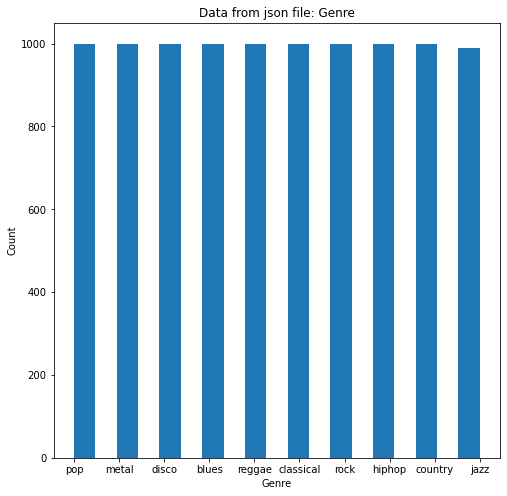

In [52]:
plot_histogram(df.label, 19, 'Data from json file: Genre', 'Genre', 'Count', 10, GENRE_CATEGORIES)

As we can see from the graph above, our dataset is very balanced. Therefore, we can skip the process of handling imbalanced data.

## 4. Split and preprocessing data

In [8]:
with open("data.json", "r") as fp:
    data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

In [9]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [10]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

## 5. Modelling and Training

## CNN
### Create network

In [11]:
tf.random.set_seed(0)

def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [12]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
cnn = build_model(input_shape)

2021-12-02 21:47:57.501500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile Model

In [13]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)         4

### Training

In [14]:
history = cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

2021-12-02 21:47:57.640592: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/30
188/188 [==============================] - 4s 19ms/step - loss: 2.6754 - accuracy: 0.1809 - val_loss: 1.8102 - val_accuracy: 0.3605
Epoch 2/30
188/188 [==============================] - 3s 16ms/step - loss: 1.8876 - accuracy: 0.3276 - val_loss: 1.4890 - val_accuracy: 0.4673
Epoch 3/30
188/188 [==============================] - 3s 16ms/step - loss: 1.6477 - accuracy: 0.4077 - val_loss: 1.3689 - val_accuracy: 0.5160
Epoch 4/30
188/188 [==============================] - 3s 16ms/step - loss: 1.5294 - accuracy: 0.4512 - val_loss: 1.2966 - val_accuracy: 0.5541
Epoch 5/30
188/188 [==============================] - 3s 17ms/step - loss: 1.4145 - accuracy: 0.4831 - val_loss: 1.2273 - val_accuracy: 0.5781
Epoch 6/30
188/188 [==============================] - 3s 16ms/step - loss: 1.3711 - accuracy: 0.5064 - val_loss: 1.1846 - val_accuracy: 0.5915
Epoch 7/30
188/188 [==============================] - 3s 16ms/step - loss: 1.2963 - accuracy: 0.5283 - val_loss: 1.1415 - val_accuracy: 0.6101

### Plot accuracy/error for training and validation

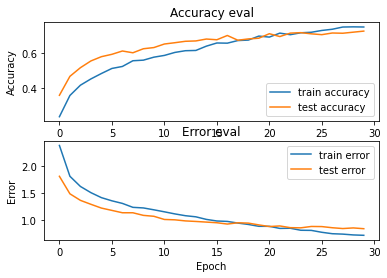

In [15]:
plot_history(history)

### Evaluate model on test set

In [20]:
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', "{:.2f}%".format(test_acc*100))

79/79 - 0s - loss: 0.8603 - accuracy: 0.6976

Test accuracy: 69.76%


### Prediction

In [17]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [18]:
# add a dimension to input data for sample - cnn.predict() expects a 4d array in this case
X = X_to_predict[np.newaxis, ...]  # array shape (1, 130, 13, 1)

# perform prediction
prediction = cnn.predict(X)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Target: {}, Predicted label: {}".format(y_to_predict, predicted_index))

Target: 2, Predicted label: [2]


## RNN

In [19]:
tf.random.set_seed(0)

def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])  # 130, 13
rnn = build_model(input_shape)

### Compile model

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
rnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

rnn.summary()

### Train model

In [ ]:
history = rnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

### Plot accuracy/error for training and validation

In [ ]:
plot_history(history)

### Evaluate model on test set

In [ ]:
test_loss, test_acc = rnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', "{:.2f}%".format(test_acc))

## 6. Evaluating Models

## Input a song

In [21]:
print("Enter youtube video link: ")
link = input()

Enter youtube video link: 
https://www.youtube.com/watch?v=NX60jOKkOSo


In [22]:
video = YouTube(link)
audio = video.streams.filter(only_audio=True, file_extension='mp4').first()
file = audio.download()

You chose the following song: 


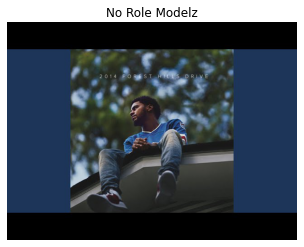

In [23]:
print("You chose the following song: ")
urllib.request.urlretrieve(video.thumbnail_url, 'thumbnail.png')  
img = Image.open("thumbnail.png")
plt.title(video.title)
plt.imshow(img)
plt.axis('off')
ipd.Audio(file) 

### Prediction

In [25]:
signal, sample_rate = librosa.load(file, sr=SAMPLE_RATE)
mfcc = librosa.feature.mfcc(signal, sample_rate, n_mfcc=13, n_fft=2048,
                                                hop_length=512)
mfcc = mfcc.T
# new_x = mfcc.reshape(len(mfcc), 13, 1)

# prediction = cnn.predict(new_x)

# # get index with max value
# predicted_index = np.argmax(prediction, axis=1)

# print("Target: {}, Predicted label: {}".format(y_to_predict, predicted_index))

/opt/miniconda3/envs/mc-ml/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
